<a href="https://colab.research.google.com/github/akrynski/TensorFlow/blob/main/TensorflowStart.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Programowanie AI, w środowisku Python z użyciem modułu bibliotecznego TensorFlow, na przeglądarkowej platformie Google Colaboratory.**
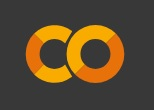
*Opracował: Andrzej Kryński*.


---


### ***Instalacja***
1. W menu *Środowisko wykonawcze* wybierz opcję resetowania środowiska wykonawczego i wykonaj. (Runtime/Factory_reset_runtime)
1. W menu *Środowisko_wykonawcze/Zmień_typ_środowiska_wykonawczego* (Runtime/Change_runtime_type) wybierz **GPU** jako *Hardware_accelerator*
1. Wykonaj komendę instalacji: !pip install tensorflow-gpu
1. Powtórnie zresetuj środowisko, tym razem używając przycisku, który się pojawi pod historią pobierania.


In [ ]:
!pip install tensorflow-gpu

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 578.0 MB 17 kB/s 
     |████████████████████████████████| 438 kB 63.7 MB/s 
     |████████████████████████████████| 5.9 MB 46.9 MB/s 
     |████████████████████████████████| 1.7 MB 52.8 MB/s 
  Attempting uninstall: tensorflow-estimator
    Found existing installation: tensorflow-estimator 2.8.0
    Uninstalling tensorflow-estimator-2.8.0:
      Successfully uninstalled tensorflow-estimator-2.8.0
  Attempting uninstall: tensorboard
    Found existing installation: tensorboard 2.8.0
    Uninstalling tensorboard-2.8.0:
      Successfully uninstalled tensorboard-2.8.0
  Attempting uninstall: keras
    Found existing installation: keras 2.8.0
    Uninstalling keras-2.8.0:
      Successfully uninstalled keras-2.8.0
  Attempting uninstall: gast
    Found existing installation: gast 0.5.3
    Uninstalling gast-0.5.3:
      Successfully uninstalled gast-0.5

In [ ]:
import tensorflow as tf
print(tf.__version__)

2.10.0


# **Pierwszy przykład - klasyfikacja**

Nasz pierwszy przykład będzie podręcznikowy więc użyjemy gotowego programu z [repozytorium githuba](https://github.com/lmoroney/funcode/blob/master/BreastCancer.ipynb), które udostępnia **Laurence Moroney**, specjalista z Google.

  >W pierwszej komórce prześlemy pliki CSV zawierające wstępnie posortowane i wstępnie znormalizowane dane.
W tym celu użyłem zestawu danych dotyczących raka piersi z Wisconsin, posortowałem go na zestawy treningowe i testowe z wartościami „wejściowymi” do sieci neuronowej jako wartościami „X” i oczekiwanym „wyjściem” (0, jeśli łagodny i 1, jeśli złośliwy) jako wartości „Y”.

In [ ]:
import pandas as pd

from google.colab import files
file = files.upload()
X_train = pd.read_csv("xtrain.csv", header=None)
Y_train = pd.read_csv("ytrain.csv", header=None)
X_test = pd.read_csv("xtest.csv", header=None)
Y_test = pd.read_csv("ytest.csv", header=None)

Saving xtest.csv to xtest.csv
Saving xtrain.csv to xtrain.csv
Saving ytest.csv to ytest.csv
Saving ytrain.csv to ytrain.csv



>Widżet przesyłania jest widoczny tylko wtedy, gdy komórka kodu została wykonana w bieżącej sesji przeglądarki. Uruchom ponownie tę komórkę, aby włączyć widok widżetów.




>Teraz użyję Kerasa do zdefiniowania sieci neuronowej, która będzie wytrenowana z tych danych. Ta sieć neuronowa może być następnie wykorzystana do przewidywania przyszłych wartości obecności raka piersi.



In [ ]:
from keras.models import Sequential
from keras.layers import Dense

classifier = Sequential() # Initialising the ANN

classifier.add(Dense(units = 16, activation = 'relu', input_dim = 30))
classifier.add(Dense(units = 8, activation = 'relu'))
classifier.add(Dense(units = 6, activation = 'relu'))
classifier.add(Dense(units = 1, activation = 'sigmoid'))


> Po zdefiniowaniu sieci neuronowej muszę teraz określić jej optymalizator i funkcję kosztu


In [ ]:
classifier.compile(optimizer = 'rmsprop', loss = 'binary_crossentropy') # https://keras.io/api/optimizers/  https://www.tensorflow.org/api_docs/python/tf/keras/metrics

>W kolejnym kroku szkolisz sieć neuronową za pomocą metody Classifier.Fit, przekazując jej dane szkoleniowe - tj. jak powinno wyglądać Y w przypadku tego zbioru danych X.
NN rozpozna wzory (paterny) w danych i zbuduje sieć neuronową, która może być zdolna do ich odtworzenia (replikacji).

In [ ]:
classifier.fit(X_train, Y_train, batch_size = 1, epochs = 100)

Epoch 1/100
455/455 [==============================] - 4s 3ms/step - loss: 0.3473
Epoch 2/100
455/455 [==============================] - 1s 3ms/step - loss: 0.1350
Epoch 3/100
455/455 [==============================] - 1s 3ms/step - loss: 0.1085
Epoch 4/100
455/455 [==============================] - 1s 3ms/step - loss: 0.0987
Epoch 5/100
455/455 [==============================] - 1s 3ms/step - loss: 0.0837
Epoch 6/100
455/455 [==============================] - 1s 3ms/step - loss: 0.0935
Epoch 7/100
455/455 [==============================] - 1s 3ms/step - loss: 0.0790
Epoch 8/100
455/455 [==============================] - 1s 3ms/step - loss: 0.0822
Epoch 9/100
455/455 [==============================] - 1s 3ms/step - loss: 0.0791
Epoch 10/100
455/455 [==============================] - 1s 3ms/step - loss: 0.0864
Epoch 11/100
455/455 [==============================] - 1s 3ms/step - loss: 0.0814
Epoch 12/100
455/455 [==============================] - 1s 3ms/step - loss: 0.0764
Epoch 13/100


>Aby przewidzieć nowe wartości, sieć neuronowa używa klasy classifier.predict. Przekazujemy jej wartości testowe dla X (których sieć neuronowa wcześniej nie widziała) i otrzymujemy zestaw przewidywań. Te przewidywania będą prawdopodobieństwami, więc uporządkuję je, mówiąc, że jeśli wynik jest większy niż 0.5, ustawię jego wartość na 1, w przeciwnym razie ustawię na 0.

In [ ]:
Y_pred = classifier.predict(X_test)
Y_pred = [ 1 if y>=0.5 else 0 for y in Y_pred ]

4/4 [==============================] - 0s 3ms/step


>Teraz możemy przejrzeć zbiór predykcji dla zestawu testowego (nazywanego Y_pred) i rzeczywistych wartości dla zestawu testowego (z komórkami Y_test) i zobaczyć, jak bardzo są do siebie podobne — jeśli są takie same, zwiększę wartość zmiennej 'correct ', w przeciwnym razie zwiększę wartość zmiennej 'wrong'. 
>
>Zobaczysz, że wynik jest w 100% dokładny, mimo że sieć neuronowa zgłosiła niższą dokładność. Czemu?




In [ ]:
total = 0
correct = 0.0
wrong = 0
for i in Y_pred:
  total=total+1
  if(Y_test.at[i,0] == Y_pred[i]):
    correct=correct+1
  else:
    wrong=wrong+1

print("Total " + str(total))
print("Correct " + str(correct))
print("Wrong " + str(wrong))

Total 114
Correct 114.0
Wrong 0



---
# **Drugi przykład - regresja liniowa**

Podobnie jak w pierwszym przykładzie skorzystam z gotowego opracowania.
Korzysta ono m.in z modułów Keras oraz seaborn. Keras jest wysokopoziomowym interfejsem programowania aplikacji (API) głębokiego uczenia.
>Odwiedź Keras [samouczki] (https://www.tensorflow.org/tutorials/keras) i [przewodniki] (https://www.tensorflow.org/guide/keras), aby dowiedzieć się więcej.

 Seaborn jest modułem bibliotecznym Pythona służącym do obrazowania danych, jak np. matplotlib.

In [ ]:
!pip install seaborn

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


>W problemie regresji celem jest przewidzenie wyniku wartości ciągłej, takiej jak cena czy prawdopodobieństwo.
>
>W tym samouczku wykorzystano klasyczny zestaw danych [Auto MPG] (https://archive.ics.uci.edu/ml/datasets/auto+mpg) i pokazano, jak budować modele do przewidywania efektywności paliwowej samochodów z końca lat 1970. i wczesnych 1980. Aby to zrobić, dostarczysz modelom opis wielu samochodów z tego okresu. Ten opis zawiera atrybuty, takie jak cylindry, pojemność skokowa, moc i waga.
 




In [ ]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

# Make NumPy printouts easier to read.
np.set_printoptions(precision=3, suppress=True)

In [ ]:
import tensorflow as tf

from tensorflow import keras
from tensorflow.keras import layers

print(tf.__version__)

2.10.0


# Zestaw danych Auto MPG
Zestaw dostępny jest na [UCI Machine Learning Repository](https://archive.ics.uci.edu/ml/)
### Pobieramy dane
Po pierwsze sprowadź i zaimportuj powyższy zestaw danych korzystając z funkcji modułu pandas:

In [ ]:
url = 'http://archive.ics.uci.edu/ml/machine-learning-databases/auto-mpg/auto-mpg.data'
column_names = ['MPG', 'Cylinders', 'Displacement', 'Horsepower', 'Weight',
                'Acceleration', 'Model Year', 'Origin']

raw_dataset = pd.read_csv(url, names=column_names,
                          na_values='?', comment='\t',
                          sep=' ', skipinitialspace=True)

In [ ]:
dataset = raw_dataset.copy()
dataset.tail()

,MPG,Cylinders,Displacement,Horsepower,Weight,Acceleration,Model Year,Origin
393,27.0,4,140.0,86.0,2790.0,15.6,82,1
394,44.0,4,97.0,52.0,2130.0,24.6,82,2
395,32.0,4,135.0,84.0,2295.0,11.6,82,1
396,28.0,4,120.0,79.0,2625.0,18.6,82,1
397,31.0,4,119.0,82.0,2720.0,19.4,82,1


Standardowo sprawdzamy czy zestaw nie zawiera nieznanych/nieokreślonych wartości:


In [ ]:
dataset.isna().sum()

MPG             0
Cylinders       0
Displacement    0
Horsepower      6
Weight          0
Acceleration    0
Model Year      0
Origin          0
dtype: int64

Pozbywamy się ich:

In [ ]:
dataset = dataset.dropna()

>Kolumna "Origin" ma charakter kategoryczny, a nie liczbowy. Następnym krokiem jest więc jednokrotne zakodowanie wartości w kolumnie za pomocą pd.get_dummies .

In [ ]:
dataset['Origin'] = dataset['Origin'].map({1: 'USA', 2: 'Europe', 3: 'Japan'})
dataset = pd.get_dummies(dataset, columns=['Origin'], prefix='', prefix_sep='')
dataset.tail()

,MPG,Cylinders,Displacement,Horsepower,Weight,Acceleration,Model Year,Europe,Japan,USA
393,27.0,4,140.0,86.0,2790.0,15.6,82,0,0,1
394,44.0,4,97.0,52.0,2130.0,24.6,82,1,0,0
395,32.0,4,135.0,84.0,2295.0,11.6,82,0,0,1
396,28.0,4,120.0,79.0,2625.0,18.6,82,0,0,1
397,31.0,4,119.0,82.0,2720.0,19.4,82,0,0,1


>>Uwaga: Możesz skonfigurować tf.keras.Model , aby wykonał tego rodzaju transformację, ale wykracza to poza zakres tego samouczka. Zapoznaj się z przykładami w sekcji Klasyfikuj uporządkowane dane przy użyciu warstw przetwarzania wstępnego Keras lub w samouczkach dotyczących ładowania danych CSV .

>### Podziel dane na zestawy treningowe i testowe
>
>Teraz podziel zestaw danych na zestaw uczący i zestaw testowy. Zestaw testowy wykorzystasz w końcowej ocenie swoich modeli.

In [ ]:
train_dataset = dataset.sample(frac=0.8, random_state=0)
test_dataset = dataset.drop(train_dataset.index)

>### Sprawdź dane
>Przejrzyj łączny rozkład kilku par kolumn ze zbioru uczącego.
>
>Górny rząd sugeruje, że efektywność paliwowa (MPG) jest funkcją wszystkich pozostałych parametrów. Pozostałe wiersze wskazują, że są one funkcjami siebie nawzajem.

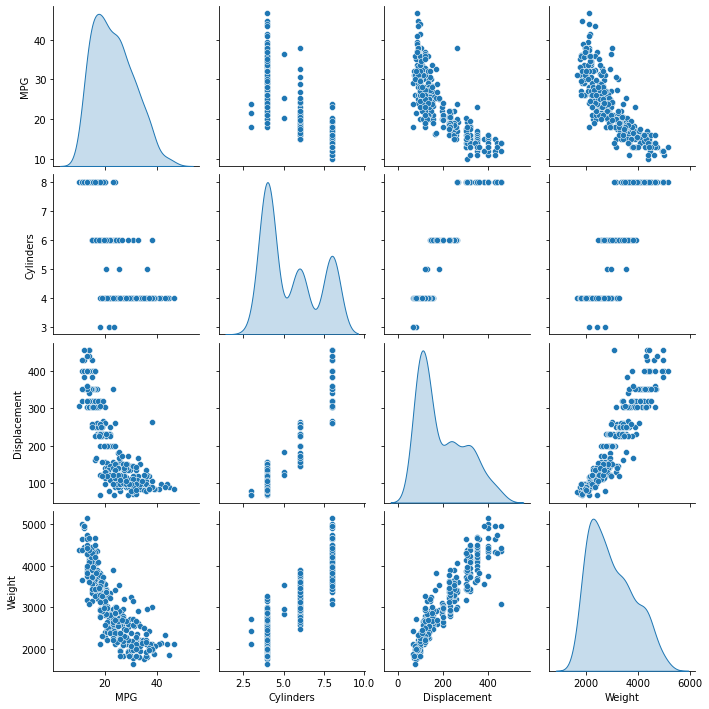

In [ ]:
sns.pairplot(train_dataset[['MPG', 'Cylinders', 'Displacement', 'Weight']], diag_kind='kde')

>Sprawdźmy też ogólne statystyki. Zwróć uwagę, że każda funkcja obejmuje bardzo inny zakres:

In [ ]:
train_dataset.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
MPG,314.0,23.310510,7.728652,10.0,17.00,22.0,28.95,46.6
Cylinders,314.0,5.477707,1.699788,3.0,4.00,4.0,8.00,8.0
Displacement,314.0,195.318471,104.331589,68.0,105.50,151.0,265.75,455.0
Horsepower,314.0,104.869427,38.096214,46.0,76.25,94.5,128.00,225.0
Weight,314.0,2990.251592,843.898596,1649.0,2256.50,2822.5,3608.00,5140.0
Acceleration,314.0,15.559236,2.789230,8.0,13.80,15.5,17.20,24.8
Model Year,314.0,75.898089,3.675642,70.0,73.00,76.0,79.00,82.0
Europe,314.0,0.178344,0.383413,0.0,0.00,0.0,0.00,1.0
Japan,314.0,0.197452,0.398712,0.0,0.00,0.0,0.00,1.0
USA,314.0,0.624204,0.485101,0.0,0.00,1.0,1.00,1.0


>### Podziel funkcje z etykiet
>Oddziel wartość docelową — „etykietę” — od funkcji. Ta etykieta jest >wartością, której przewidywania będziesz trenował model.


In [ ]:
train_features = train_dataset.copy()
test_features = test_dataset.copy()

train_labels = train_features.pop('MPG')
test_labels = test_features.pop('MPG')

>### Normalizacja 
>W tabeli statystyk łatwo zobaczyć, jak różne są zakresy poszczególnych funkcji:

In [ ]:
train_dataset.describe().transpose()[['mean', 'std']]

,mean,std
MPG,23.310510,7.728652
Cylinders,5.477707,1.699788
Displacement,195.318471,104.331589
Horsepower,104.869427,38.096214
Weight,2990.251592,843.898596
Acceleration,15.559236,2.789230
Model Year,75.898089,3.675642
Europe,0.178344,0.383413
Japan,0.197452,0.398712
USA,0.624204,0.485101


>Dobrą praktyką jest normalizowanie funkcji, które używają różnych skal i >zakresów.
>
>Jednym z powodów, dla których jest to ważne, jest to, że cechy są mnożone >przez wagi modelu. Tak więc skala wyjść i skala gradientów zależy od skali >wejść.
>
>Chociaż model może być zbieżny bez normalizacji funkcji, normalizacja sprawia, >że ​​szkolenie jest znacznie bardziej stabilne.

>>Uwaga: nie ma żadnej korzyści z normalizacji funkcji „jeden gorący” — robi
>>się to tutaj dla uproszczenia. Aby uzyskać więcej informacji na temat
>>korzystania z warstw przetwarzania wstępnego, zapoznaj się z przewodnikiem
>>Praca z warstwami przetwarzania wstępnego i samouczkiem Klasyfikuj dane
>>strukturalne za pomocą warstw przetwarzania wstępnego Keras .

>### Warstwa normalizacji
>tf.keras.layers.Normalization to czysty i prosty sposób na dodanie
>normalizacji funkcji do modelu.
>
>Pierwszym krokiem jest stworzenie warstwy:

In [ ]:
normalizer = tf.keras.layers.Normalization(axis=-1)

>Następnie dopasuj stan warstwy przetwarzania wstępnego do danych, wywołując Normalization.adapt :

In [ ]:
normalizer.adapt(np.array(train_features))

>Oblicz średnią i wariancję i zapisz je w warstwie:

In [ ]:
print(normalizer.mean.numpy())

[[   5.478  195.318  104.869 2990.252   15.559   75.898    0.178    0.197
     0.624]]


>Gdy warstwa jest wywoływana, zwraca dane wejściowe, przy czym każdy element jest niezależnie znormalizowany:

In [ ]:
first = np.array(train_features[:1])

with np.printoptions(precision=2, suppress=True):
  print('First example:', first)
  print()
  print('Normalized:', normalizer(first).numpy())

First example: [[   4.    90.    75.  2125.    14.5   74.     0.     0.     1. ]]

Normalized: [[-0.87 -1.01 -0.79 -1.03 -0.38 -0.52 -0.47 -0.5   0.78]]


>## Regresja liniowa
>Przed zbudowaniem głębokiego modelu sieci neuronowej zacznij od regresji >liniowej z wykorzystaniem jednej i kilku zmiennych.
>
>### Regresja liniowa z jedną zmienną
>Rozpocznij od regresji liniowej z jedną zmienną, aby przewidzieć 'MPG' z >'Horsepower' .
>
>Trenowanie modelu za pomocą tf.keras zwykle rozpoczyna się od zdefiniowania >architektury modelu. Użyj modelu tf.keras.Sequential , który reprezentuje >sekwencję kroków .
>
>Model regresji liniowej z jedną zmienną składa się z dwóch etapów:
>
>Normalizuj funkcje wejściowe 'Horsepower' za pomocą warstwy przetwarzania >wstępnego tf.keras.layers.Normalization .
>Zastosuj transformację liniową $(y=mx+b)$, aby uzyskać 1 wynik przy użyciu >warstwy liniowej ( tf.keras.layers.Dense ).
>Liczbę danych wejściowych można ustawić za pomocą argumentu input_shape lub >automatycznie, gdy model jest uruchamiany po raz pierwszy.
>
>Najpierw utwórz tablicę NumPy utworzoną z funkcji 'Horsepower' . Następnie >utwórz instancję tf.keras.layers.Normalization i dopasuj jej stan do danych >dotyczących horsepower : 

In [ ]:
horsepower = np.array(train_features['Horsepower'])

horsepower_normalizer = layers.Normalization(input_shape=[1,], axis=None)
horsepower_normalizer.adapt(horsepower)

>Zbuduj model Keras Sequential:

In [ ]:
horsepower_model = tf.keras.Sequential([
    horsepower_normalizer,
    layers.Dense(units=1)
])

horsepower_model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 normalization_1 (Normalizat  (None, 1)                3         
 ion)                                                            
                                                                 
 dense_4 (Dense)             (None, 1)                 2         
                                                                 
Total params: 5
Trainable params: 2
Non-trainable params: 3
_________________________________________________________________


>Model ten przewiduje 'MPG' z 'Horsepower' .
>
>Uruchom nieprzeszkolony model na pierwszych 10 wartościach „Moc”. Wynik nie będzie dobry, ale zauważ, że ma oczekiwany kształt (10, 1) :

In [ ]:
horsepower_model.predict(horsepower[:10])

1/1 [==============================] - 0s 19ms/step


array([[-0.347],
       [-0.196],
       [ 0.641],
       [-0.487],
       [-0.44 ],
       [-0.173],
       [-0.522],
       [-0.44 ],
       [-0.115],
       [-0.196]], dtype=float32)

>Po skompilowaniu modelu skonfiguruj procedurę uczenia przy użyciu metody Keras Model.compile . Najważniejszymi argumentami do kompilacji są loss i optimizer , ponieważ definiują one, co zostanie zoptymalizowane ( mean_absolute_error ) i jak (za pomocą tf.keras.optimizers.Adam ).

In [ ]:
horsepower_model.compile(
    optimizer=tf.optimizers.Adam(learning_rate=0.1),
    loss='mean_absolute_error')

>Użyj Keras Model.fit , aby przeprowadzić szkolenie dla 100 epok:

In [ ]:
%%time
history = horsepower_model.fit(
    train_features['Horsepower'],
    train_labels,
    epochs=100,
    # Suppress logging.
    verbose=0,
    # Calculate validation results on 20% of the training data.
    validation_split = 0.2)

CPU times: user 4.54 s, sys: 367 ms, total: 4.91 s
Wall time: 4.26 s


>Wizualizuj postęp treningu modelu za pomocą statystyk przechowywanych w obiekcie history :

In [ ]:
hist = pd.DataFrame(history.history)
hist['epoch'] = history.epoch
hist.tail()

,loss,val_loss,epoch
95,3.803854,4.190681,95
96,3.802816,4.180385,96
97,3.803870,4.183984,97
98,3.807530,4.192213,98
99,3.802699,4.201138,99


In [ ]:
def plot_loss(history):
  plt.plot(history.history['loss'], label='loss')
  plt.plot(history.history['val_loss'], label='val_loss')
  plt.ylim([0, 10])
  plt.xlabel('Epoch')
  plt.ylabel('Error [MPG]')
  plt.legend()
  plt.grid(True)

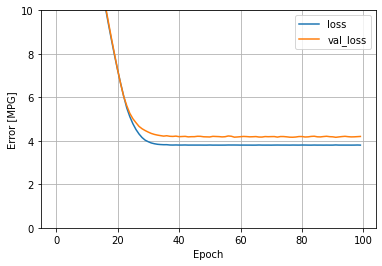

In [ ]:
plot_loss(history)

>Zbierz wyniki na zestawie testowym na później:

In [ ]:
test_results = {}

test_results['horsepower_model'] = horsepower_model.evaluate(
    test_features['Horsepower'],
    test_labels, verbose=0)

>Ponieważ jest to regresja z pojedynczą zmienną, łatwo jest wyświetlić prognozy modelu jako funkcję danych wejściowych:

In [ ]:
x = tf.linspace(0.0, 250, 251)
y = horsepower_model.predict(x)

8/8 [==============================] - 0s 2ms/step


In [ ]:
def plot_horsepower(x, y):
  plt.scatter(train_features['Horsepower'], train_labels, label='Data')
  plt.plot(x, y, color='k', label='Predictions')
  plt.xlabel('Horsepower')
  plt.ylabel('MPG')
  plt.legend()

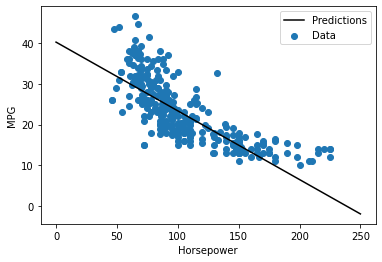

In [ ]:
plot_horsepower(x, y)

# Regresja liniowa z wieloma danymi wejściowymi
>Możesz użyć prawie identycznej konfiguracji, aby przewidywać na podstawie wielu danych wejściowych. Ten model nadal wykonuje to samo  z wyjątkiem tego, że  jest macierzą, a  jest wektorem.
>
>Ponownie utwórz dwuetapowy model Keras Sequential z pierwszą warstwą będącą normalizer ( tf.keras.layers.Normalization(axis=-1) ) zdefiniowaną wcześniej i zaadaptowaną do całego zestawu danych:

In [ ]:
linear_model = tf.keras.Sequential([
    normalizer,
    layers.Dense(units=1)
])

>Kiedy wywołujesz Model.predict dla partii danych wejściowych, generuje units=1 wyjścia dla każdego przykładu:

In [ ]:
linear_model.predict(train_features[:10])

1/1 [==============================] - 0s 43ms/step


array([[-1.211],
       [ 1.297],
       [-0.118],
       [ 0.791],
       [-0.225],
       [ 1.612],
       [-0.116],
       [ 3.656],
       [ 0.199],
       [-1.637]], dtype=float32)

>Kiedy wywołasz model, zbudowane zostaną jego macierze wag — sprawdź, czy wagi kernel ($m$  w $y=mx+b$) mają kształt (9, 1) :

In [ ]:
linear_model.layers[1].kernel

<tf.Variable 'dense_5/kernel:0' shape=(9, 1) dtype=float32, numpy=
array([[-0.287],
       [ 0.754],
       [-0.565],
       [ 0.657],
       [ 0.699],
       [ 0.763],
       [ 0.074],
       [-0.605],
       [-0.094]], dtype=float32)>

>Skonfiguruj model za pomocą Keras Model.compile i trenuj za pomocą Model.fit przez 100 epok:

In [ ]:
linear_model.compile(
    optimizer=tf.optimizers.Adam(learning_rate=0.1),
    loss='mean_absolute_error')

In [ ]:
%%time
history = linear_model.fit(
    train_features,
    train_labels,
    epochs=100,
    # Suppress logging.
    verbose=0,
    # Calculate validation results on 20% of the training data.
    validation_split = 0.2)

CPU times: user 4.57 s, sys: 377 ms, total: 4.94 s
Wall time: 5.42 s


>Użycie wszystkich danych wejściowych w tym modelu regresji pozwala uzyskać znacznie niższy błąd uczenia i walidacji niż model horsepower_model , który miał jedno dane wejściowe:

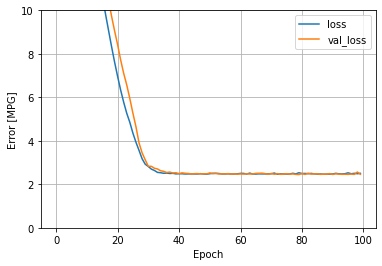

In [ ]:
plot_loss(history)

>Zbierz wyniki na zestawie testowym na później:

In [ ]:
test_results['linear_model'] = linear_model.evaluate(
    test_features, test_labels, verbose=0)



---



@pochodzenie_danych{
1. Machine Learning Repository at http://archive.ics.uci.edu/ml
1. Github repository https://github.com/adityapujari
1. Github repository https://github.com/lmoroney
 }


---


 _CITATION = """\
@misc{Dua:2019 ,
author = "Dua, Dheeru and Graff, Casey",
year = "2017",
title = "{UCI} Machine Learning Repository",
url = "http://archive.ics.uci.edu/ml",
institution = "University of California, Irvine, School of Information and Computer Sciences"
}
"""
---
### **LICENCJE**

@title Licensed under the Apache License, Version 2.0 (the "License");
you may not use this file except in compliance with the License.
you may obtain a copy of the License at

https://www.apache.org/licenses/LICENSE-2.0

Unless required by applicable law or agreed to in writing, software
distributed under the License is distributed on an "AS IS" BASIS,
WITHOUT WARRANTIES OR CONDITIONS OF ANY KIND, either express or implied.
See the License for the specific language governing permissions and
limitations under the License.

#@title MIT License

#Copyright (c) 2017 François Chollet

Permission is hereby granted, free of charge, to any person obtaining a
copy of this software and associated documentation files (the "Software"),
to deal in the Software without restriction, including without limitation
the rights to use, copy, modify, merge, publish, distribute, sublicense,
and/or sell copies of the Software, and to permit persons to whom the
Software is furnished to do so, subject to the following conditions:

The above copyright notice and this permission notice shall be included in
all copies or substantial portions of the Software.

THE SOFTWARE IS PROVIDED "AS IS", WITHOUT WARRANTY OF ANY KIND, EXPRESS OR
IMPLIED, INCLUDING BUT NOT LIMITED TO THE WARRANTIES OF MERCHANTABILITY,
FITNESS FOR A PARTICULAR PURPOSE AND NONINFRINGEMENT. IN NO EVENT SHALL
THE AUTHORS OR COPYRIGHT HOLDERS BE LIABLE FOR ANY CLAIM, DAMAGES OR OTHER
LIABILITY, WHETHER IN AN ACTION OF CONTRACT, TORT OR OTHERWISE, ARISING
FROM, OUT OF OR IN CONNECTION WITH THE SOFTWARE OR THE USE OR OTHER
DEALINGS IN THE SOFTWARE.